### Candidate Elimination Algorithm

In [33]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [34]:
df = pd.read_csv("./dataset/PlayTennis.csv")
df

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [36]:
le = LabelEncoder()
df = df.apply(le.fit_transform) # encode the dataset
df

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,2,1,0,1,0
1,2,1,0,0,0
2,0,1,0,1,1
3,1,2,0,1,1
4,1,0,1,1,1
5,1,0,1,0,0
6,0,0,1,0,1
7,2,2,0,1,0
8,2,0,1,1,1
9,1,2,1,1,1


In [37]:
X = df.drop(columns=['Play Tennis'], axis = 1)
X

,Outlook,Temperature,Humidity,Wind
0,2,1,0,1
1,2,1,0,0
2,0,1,0,1
3,1,2,0,1
4,1,0,1,1
5,1,0,1,0
6,0,0,1,0
7,2,2,0,1
8,2,0,1,1
9,1,2,1,1


In [39]:
Y = df['Play Tennis']
Y

0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    0
Name: Play Tennis, dtype: int64

In [41]:
# training model
model = DecisionTreeClassifier(criterion='entropy', random_state=42)
model.fit(X, Y)

DecisionTreeClassifier(criterion='entropy', random_state=42)

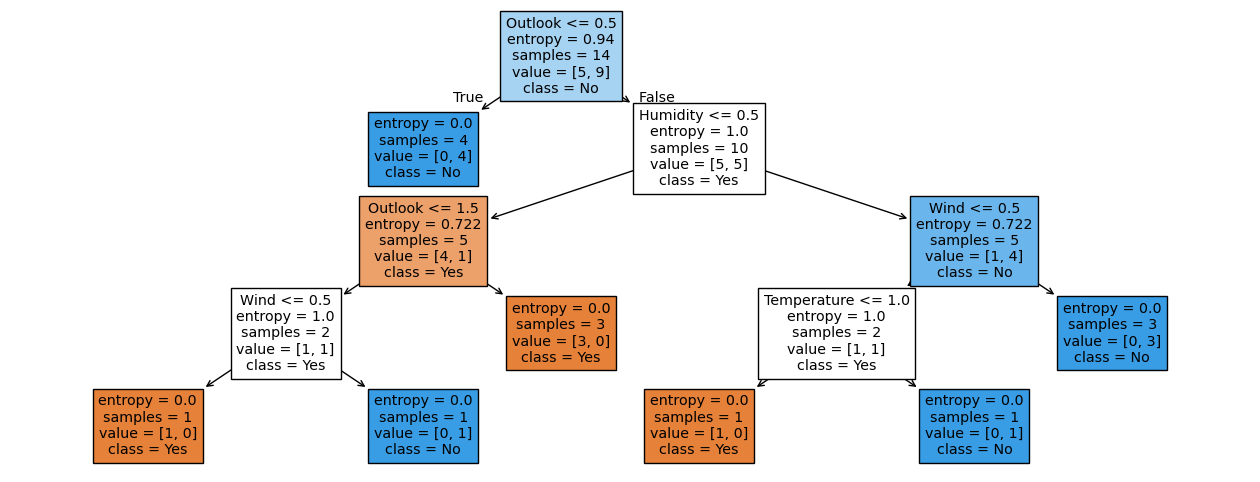

In [42]:
plt.figure(figsize=(16, 6))
plot_tree(model, feature_names=['Outlook', 'Temperature', 'Humidity', 'Wind'], class_names=['Yes', 'No'], filled=True)
plt.show()

In [ ]:
result = model.predict([[0, 0, 0, 0]])[0]

print('Play: Yes' if result == 1 else 'Play: No')